# Import Packages and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('boston_data.csv')
df

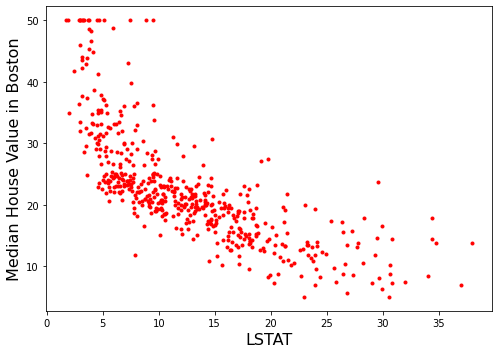

In [51]:
# Take LSTAT as the X variable and Make the plot
x = df['LSTAT']
y = df["MEDV"] 

plt.figure(figsize=(8,5.6))
plt.plot(x, y,'ro',ms=3)
plt.xlabel('LSTAT', fontsize = 16)
plt.ylabel('Median House Value in Boston', fontsize = 16)
plt.show()

In [67]:
# Regression without log terms
X = sm.add_constant(x) ## this package needs to manually add an intercept (beta_0)

# Fit Least Squares Estimate
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

In [68]:
# Print out the model statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           5.08e-88
Time:                        10:45:39   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

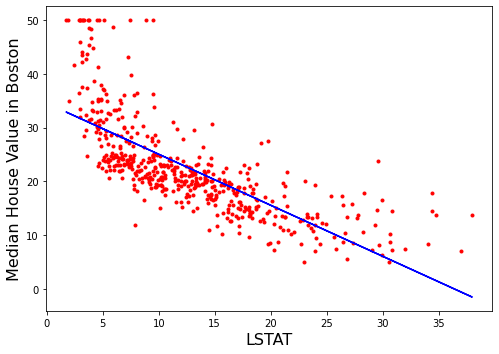

In [70]:
# Make the plot
y_pred = model.predict(X)

plt.figure(figsize=(8,5.6))
plt.plot(x, y,'ro',ms=3)
plt.plot(x, y_pred, color = 'blue')
plt.xlabel('LSTAT', fontsize = 16)
plt.ylabel('Median House Value in Boston', fontsize = 16)
plt.show()

eval_env: 1


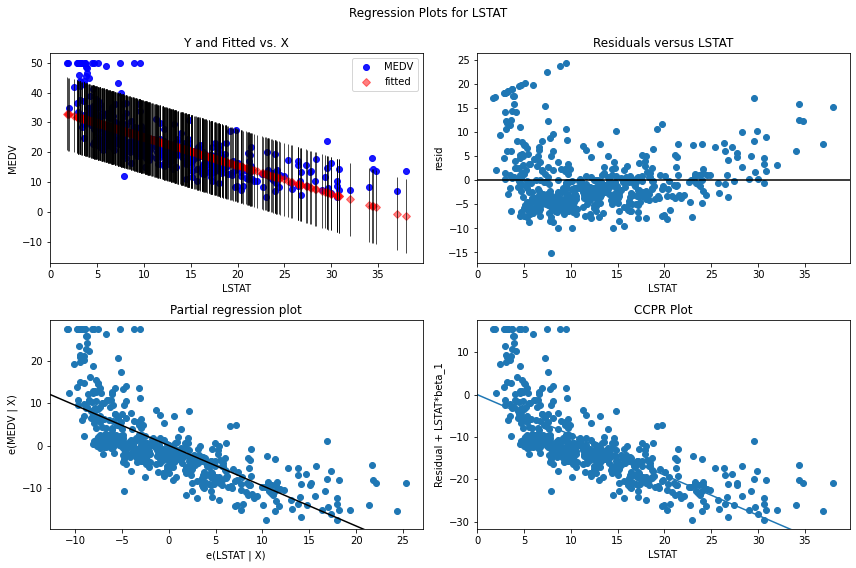

In [71]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'LSTAT', fig=fig)
plt.show()

In [72]:
res = model.resid
res

0      -5.822595
1      -4.270390
2       3.974858
3       1.639304
4       6.709922
         ...    
501    -2.966864
502    -5.327393
503    -5.295563
504    -6.397521
505   -15.167452
Length: 506, dtype: float64

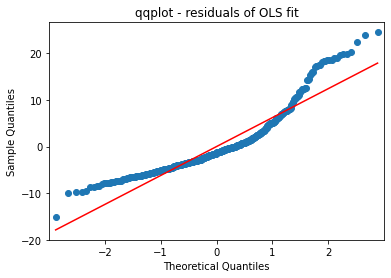

In [73]:
pplot = sm.ProbPlot(res)
fig = pplot.qqplot(line='s')
h = plt.title("qqplot - residuals of OLS fit")
plt.show()

## Log Terms

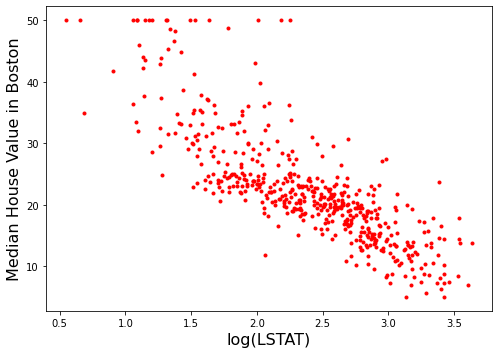

In [74]:
# Make the plot for log terms
x_log = np.log(df['LSTAT'])

plt.figure(figsize=(8,5.6))
plt.plot(x_log, y,'ro',ms=3)
plt.xlabel('log(LSTAT)', fontsize = 16)
plt.ylabel('Median House Value in Boston', fontsize = 16)
plt.show()

## Regression with log terms

In [75]:
import statsmodels.formula.api as smf
model = smf.ols(formula='MEDV ~ np.log(LSTAT)', data=df).fit()

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          9.28e-122
Time:                        10:46:30   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004      0.000      50.228      54.021
np.log(LSTAT)   -12.4810      0.395    -31.627      0.000     -13.256     -11.706
==============================================================================
Omnibus:                      126.181   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.855
Skew:                           1.237   Prob(JB):                     4.74e-71
Kurtosis:                       6.039   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

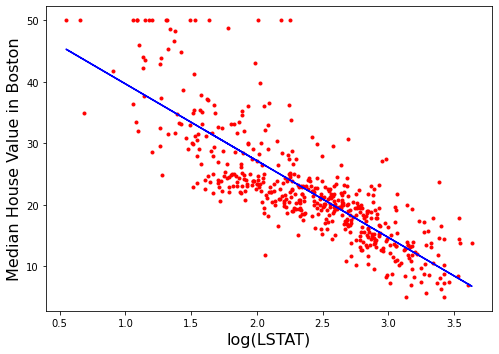

In [78]:
# Make the plot with log terms
y_values = model.predict(df) # need to use the dataframe for prediction

plt.figure(figsize=(8,5.6))
plt.plot(x_log, y,'ro',ms=3)
plt.plot(x_log, y_values, color = 'blue')
plt.xlabel('log(LSTAT)', fontsize = 16)
plt.ylabel('Median House Value in Boston', fontsize = 16)
plt.show()

eval_env: 1


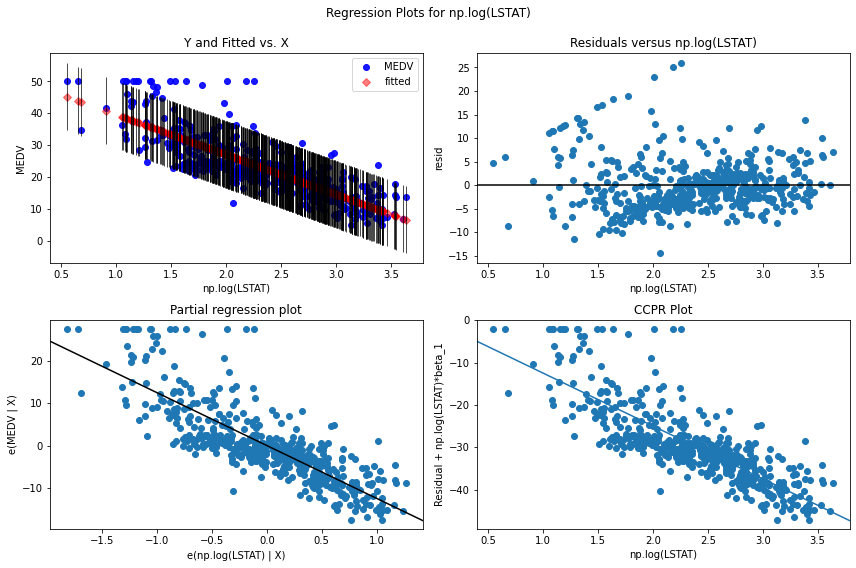

In [79]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'np.log(LSTAT)', fig=fig)
plt.show()

In [80]:
res = model.resid

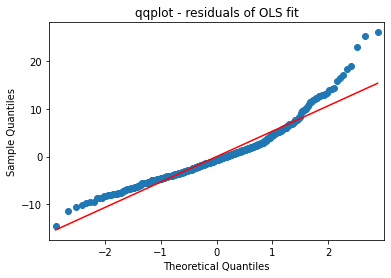

In [81]:
pplot = sm.ProbPlot(res)
fig = pplot.qqplot(line='s')
h = plt.title("qqplot - residuals of OLS fit")
plt.show()

## Categorical Varibles

In [83]:
# Take a look at the CHAS variable
df.CHAS.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CHAS, dtype: float64

In [84]:
df.CHAS.value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [109]:
import statsmodels.formula.api as smf
model = smf.ols(formula='MEDV ~ C(CHAS) + np.log(LSTAT)', data=df).fit()

In [110]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     530.1
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          1.43e-124
Time:                        11:11:01   Log-Likelihood:                -1553.4
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     503   BIC:                             3125.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         51.5250      0.956     53.899      0.000      49.647      53.403
C(CHAS)[T.1.0]     4.1819      0.918      4.554      0.000       2.378       5.986
np.log(LSTAT)    -12.3500      0.388    -31.814      0.000     -13.113     -11.587
==============================================================================
Omnibus:                      126.805   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.582
Skew:                           1.230   Prob(JB):                     1.35e-73
Kurtosis:                       6.140   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

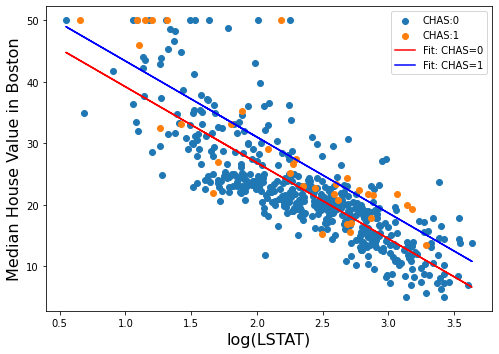

In [111]:
# Scatter plot by CHAS and predicted regression lines
plt.figure(figsize=(8,5.6))

plt.scatter(np.log(df.LSTAT[df.CHAS == 0]), y[df.CHAS == 0], label='CHAS:0', marker='o')
plt.scatter(np.log(df.LSTAT[df.CHAS == 1]), y[df.CHAS == 1], label='CHAS:1', marker='o')
    
x = df['LSTAT']
# Plot regression lines for CHAS=0 and CHAS=1
y_vals_0 = model.predict(pd.DataFrame({'LSTAT': x, 'CHAS': 0}))
y_vals_1 = model.predict(pd.DataFrame({'LSTAT': x, 'CHAS': 1}))

# Plot regression lines
plt.plot(x_log, y_vals_0, color='red', label='Fit: CHAS=0')
plt.plot(x_log, y_vals_1, color='blue', label='Fit: CHAS=1')

plt.legend()
plt.xlabel('log(LSTAT)', fontsize=16)
plt.ylabel('Median House Value in Boston', fontsize=16)
plt.show()

## Interaction Term

In [100]:
# Model with interaction

import statsmodels.formula.api as smf
model = smf.ols(formula='MEDV ~ C(CHAS) + np.log(LSTAT) + C(CHAS) : np.log(LSTAT)', data=df).fit()

In [101]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     354.8
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          1.35e-123
Time:                        11:02:53   Log-Likelihood:                -1552.4
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     502   BIC:                             3130.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       51.0995      1.000     51.075      0.000      49.134      53.065
C(CHAS)[T.1.0]                   8.3909      3.090      2.715      0.007       2.320      14.462
np.log(LSTAT)                  -12.1715      0.408    -29.868      0.000     -12.972     -11.371
C(CHAS)[T.1.0]:np.log(LSTAT)    -1.8922      1.327     -1.426      0.154      -4.498       0.714
==============================================================================
Omnibus:                      128.919   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.383
Skew:                           1.239   Prob(JB):                     4.99e-77
Kurtosis:                       6.245   Cond. No.                         38.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# Another way to model with interaction

import statsmodels.formula.api as smf
model = smf.ols(formula='MEDV ~ C(CHAS) * np.log(LSTAT)', data=df).fit()

In [114]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     354.8
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          1.35e-123
Time:                        11:11:22   Log-Likelihood:                -1552.4
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     502   BIC:                             3130.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       51.0995      1.000     51.075      0.000      49.134      53.065
C(CHAS)[T.1.0]                   8.3909      3.090      2.715      0.007       2.320      14.462
np.log(LSTAT)                  -12.1715      0.408    -29.868      0.000     -12.972     -11.371
C(CHAS)[T.1.0]:np.log(LSTAT)    -1.8922      1.327     -1.426      0.154      -4.498       0.714
==============================================================================
Omnibus:                      128.919   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.383
Skew:                           1.239   Prob(JB):                     4.99e-77
Kurtosis:                       6.245   Cond. No.                         38.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

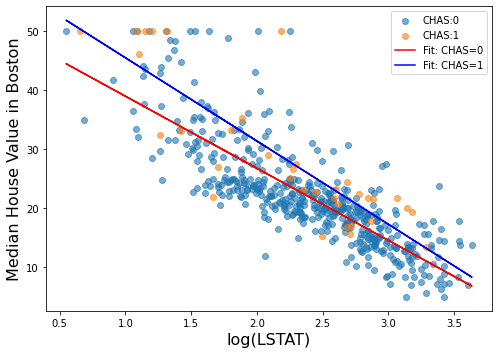

In [115]:
plt.figure(figsize=(8,5.6))
# Scatter plot for each CHAS category
plt.scatter(np.log(df.LSTAT[df.CHAS == 0]), y[df.CHAS == 0], label='CHAS:0', alpha=0.6)
plt.scatter(np.log(df.LSTAT[df.CHAS == 1]), y[df.CHAS == 1], alpha=0.6, label='CHAS:1')

x = df['LSTAT']
# Predictions for CHAS=0 and CHAS=1
y_vals_0 = model.predict(pd.DataFrame({'LSTAT': x, 'CHAS': 0}))
y_vals_1 = model.predict(pd.DataFrame({'LSTAT': x, 'CHAS': 1}))

# Plot regression lines
plt.plot(x_log, y_vals_0, color='red', label='Fit: CHAS=0')
plt.plot(x_log, y_vals_1, color='blue', label='Fit: CHAS=1')

# Labels and Legend
plt.xlabel('log(LSTAT)', fontsize=16)
plt.ylabel('Median House Value in Boston', fontsize=16)
plt.legend()
plt.show()

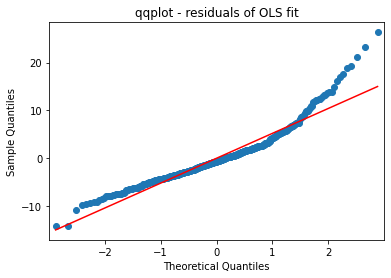

In [117]:
res = model.resid
pplot = sm.ProbPlot(res)
fig = pplot.qqplot(line='s')
h = plt.title("qqplot - residuals of OLS fit")
plt.show()

## Box-Cox Transformation

In [118]:
from scipy import stats
import matplotlib.pyplot as plt

In [119]:
# generates 500 random variates from the log-Gamma distribution 
# with a shape parameter of 5, then 5 is added to each of the generated values
y = stats.loggamma.rvs(5, size=500) + 5 
y[:10]

array([6.6865903 , 6.54060926, 6.72254587, 7.30718959, 6.09057487,
       6.35254079, 5.87445497, 6.41904926, 7.38694686, 6.59065955])

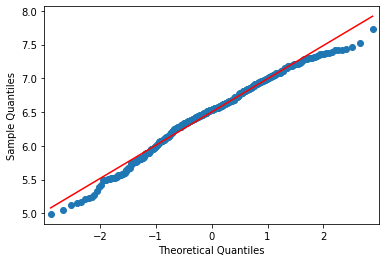

In [120]:
# Before Box-Cox
pplot = sm.ProbPlot(y)
fig = pplot.qqplot(line='s')
plt.show()

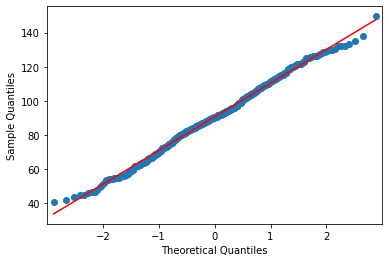

In [121]:
# After Box-Cox
y_bc, lambda_bc = stats.boxcox(y)
pplot = sm.ProbPlot(y_bc)
fig = pplot.qqplot(line='s')
plt.show()

In [122]:
lambda_bc

2.9841265193041

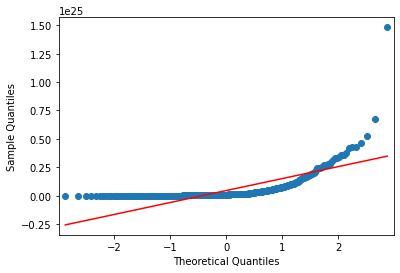

In [123]:
# Specify another variable of lambda
y_bc = stats.boxcox(y,lmbda = 30)
pplot = sm.ProbPlot(y_bc)
fig = pplot.qqplot(line='s')
plt.show()

# Multicollinearity

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the dataset
X = np.array([
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])
y = np.array([0.47, 0.48, 0.1, 0.2, -0.05, -0.1, 0.51])

X = sm.add_constant(X)

# Calculate Variance Inflation Factor (VIF) for each variable
vif_data = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

vif_data

[0.0, inf, inf, inf]

In [125]:
X

array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 0., 1.],
       [1., 1., 0., 0.]])

In [126]:
# Fit Least Squares Estimate
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

# Print out the model statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     13.49
Date:                Mon, 17 Mar 2025   Prob (F-statistic):             0.0167
Time:                        11:13:41   Log-Likelihood:                 7.2181
No. Observations:                   7   AIC:                            -8.436
Df Residuals:                       4   BIC:                            -8.598
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1404      0.033      4.261      0.013       0.049       0.232
x1             0.3462      0.057      6.067      0.004       0.188       0.505
x2            -0.0654      0.066     -0.993      0.377      -0.248       0.118
x3            -0.1404      0.066     -2.131      0.100      -0.323       0.043
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.735
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.438
Skew:                           0.002   Prob(JB):                        0.803
Kurtosis:                       1.775   Cond. No.                     2.25e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.87e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [127]:
X = np.array([
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])

y = np.array([0.47, 0.48, 0.1, 0.2, -0.05, -0.1, 0.51])

X = np.delete(X, 0, axis=1)
X = sm.add_constant(X) ## this package needs to manually add an intercept (beta_0)

# Fit Least Squares Estimate
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

# Print out the model statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     13.49
Date:                Mon, 17 Mar 2025   Prob (F-statistic):             0.0167
Time:                        11:13:49   Log-Likelihood:                 7.2181
No. Observations:                   7   AIC:                            -8.436
Df Residuals:                       4   BIC:                            -8.598
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4867      0.066      7.385      0.002       0.304       0.670
x1            -0.4117      0.104     -3.951      0.017      -0.701      -0.122
x2            -0.4867      0.104     -4.671      0.010      -0.776      -0.197
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.735
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.438
Skew:                           0.002   Prob(JB):                        0.803
Kurtosis:                       1.775   Cond. No.                         3.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""